*Ecole Nationale des sciences appliquées à Berrechid*  
Module: Intelligence Artificielle


---

#Compte Rendu  du TP2                      

---

> Cher Professeur: CHRAIBI Amine

> Réalisé par:**Wissal CHARRAKI**

---



Exercice 1 : K-Nearest Neighbors (K-NN)
Calcul de la distance euclidienne : Utilise la formule de la distance euclidienne pour calculer la distance entre la nouvelle observation
(
170
,
68
,
32
,
76
)
(170,68,32,76) et chaque ligne des données existantes.

Trouver les 3 plus proches voisins (K=3) : Trie les distances calculées pour identifier les trois plus petites. Ces observations sont les voisins les plus proches pour
𝐾
=
3
K=3.

Vote majoritaire pour la prédiction : Une fois les 3 voisins identifiés, utilise le vote majoritaire pour déterminer la catégorie prédite de la nouvelle observation.

Impact de K=5 : Recalcule les 5 plus proches voisins et effectue la prédiction avec le vote majoritaire pour comparer l'impact d'un plus grand
𝐾
K.

Choix optimal de
𝐾
K : En général, des techniques comme la validation croisée permettent d'optimiser
𝐾
K. Un
𝐾
K trop faible peut entraîner un modèle trop sensible, alors qu'un
𝐾
K trop élevé peut le rendre moins réactif aux variations dans les données.

Impact des caractéristiques avec des valeurs disparates : Si une caractéristique, comme la fréquence cardiaque, a des valeurs disproportionnées par rapport aux autres, elle peut dominer la distance. Pour corriger cela, il est souvent utile de normaliser les données.

Description des données :
 .. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each 

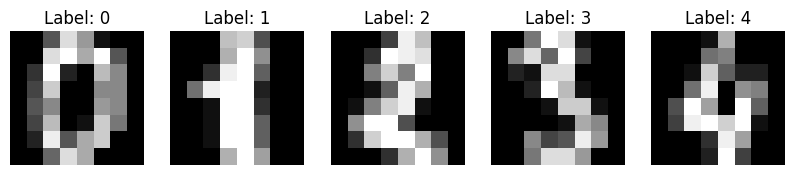

Accuracy pour K=1: 0.98
Accuracy pour K=3: 0.99
Accuracy pour K=5: 0.99
Accuracy pour K=7: 0.99
Accuracy pour K=9: 0.98
Matrice de confusion pour K=1:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 53  0  0  0  0  1  0]
 [ 0  1  0  0 59  0  0  0  0  0]
 [ 0  0  0  0  0 65  0  0  0  1]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  0  0  0 41  1]
 [ 0  0  0  2  1  0  0  0  0 56]]

Matrice de confusion pour K=3:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  0  0  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  0 66  0  0  0  0]
 [ 0  0  0  0  0  0 53  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  1]
 [ 0  1  0  0  0  0  0  0 42  0]
 [ 0  0  0  1  1  1  0  0  1 55]]

Matrice de confusion pour K=5:
[[53  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 54  0  0  0  

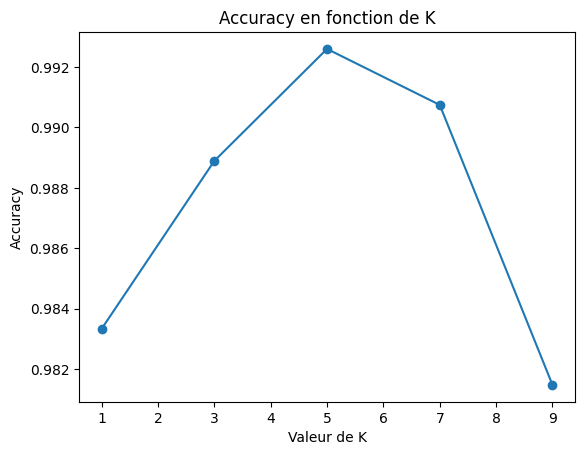

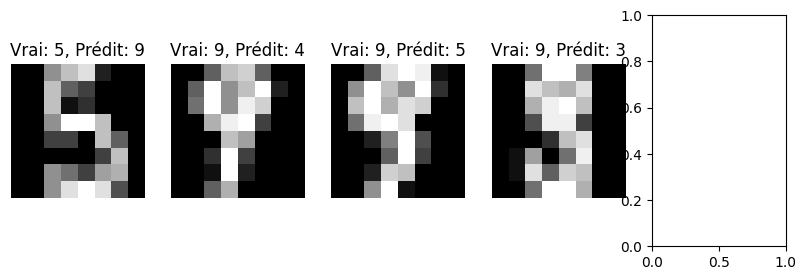

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
digits = datasets.load_digits()
print("Description des données :\n", digits.DESCR)

# Affichage de quelques images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3, random_state=42)

k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy pour K={k}: {accuracy:.2f}')
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f'Matrice de confusion pour K={k}:\n{cm}\n')
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valeur de K')
plt.ylabel("Accuracy")
plt.title("Accuracy en fonction de K")
plt.show()

best_k = k_values[np.argmax(accuracies)]
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Identifier les erreurs
errors = np.where(y_pred != y_test)[0]

# Affichage de quelques erreurs
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, idx in zip(axes, errors[:5]):
    ax.imshow(X_test[idx].reshape(8, 8), cmap='gray')
    ax.set_title(f'Vrai: {y_test[idx]}, Prédit: {y_pred[idx]}')
    ax.axis('off')
plt.show()

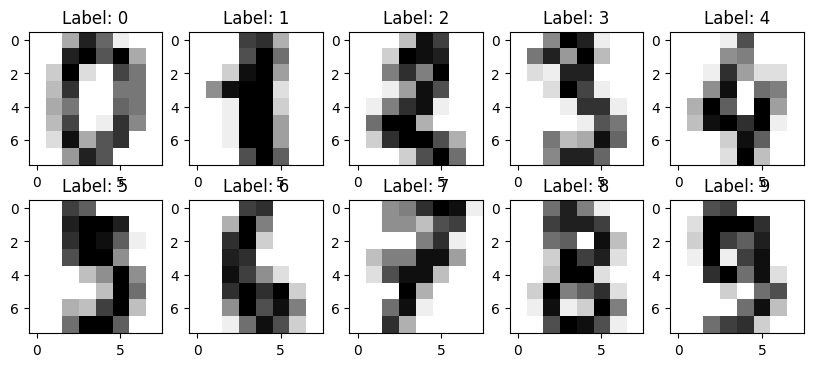

Accuracy for K=1: 0.98
Accuracy for K=3: 0.99
Accuracy for K=5: 0.99
Accuracy for K=7: 0.99
Accuracy for K=9: 0.98


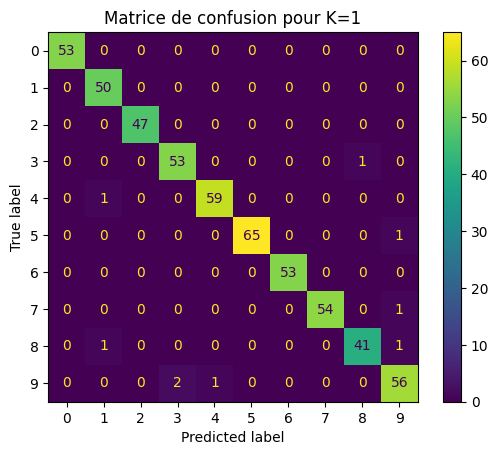

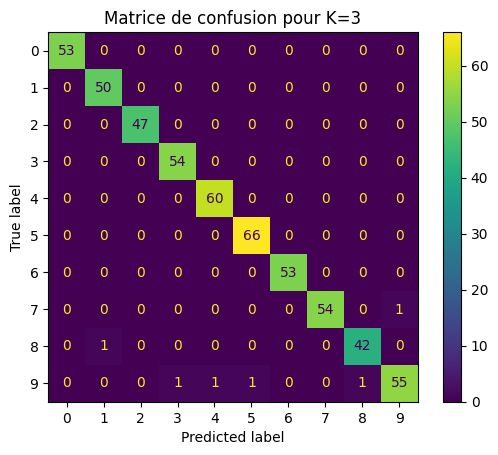

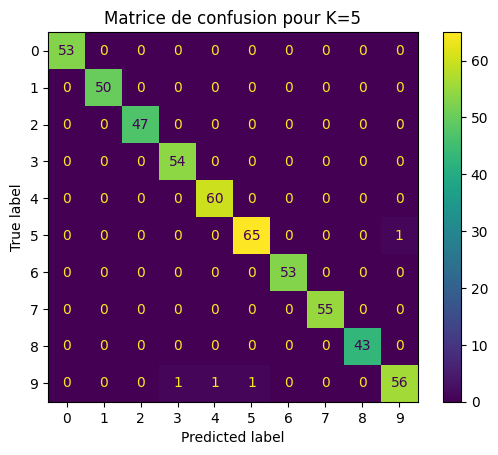

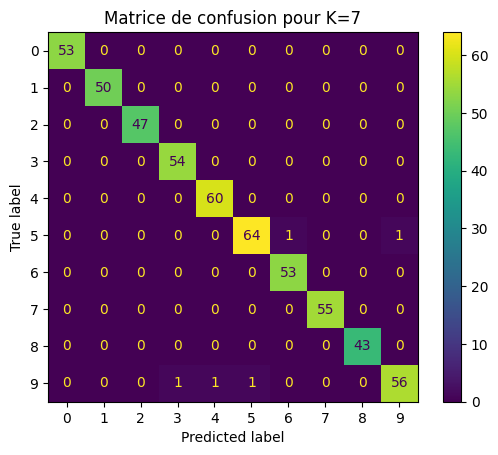

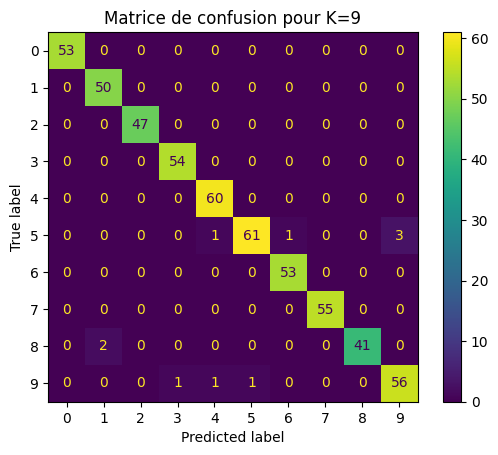

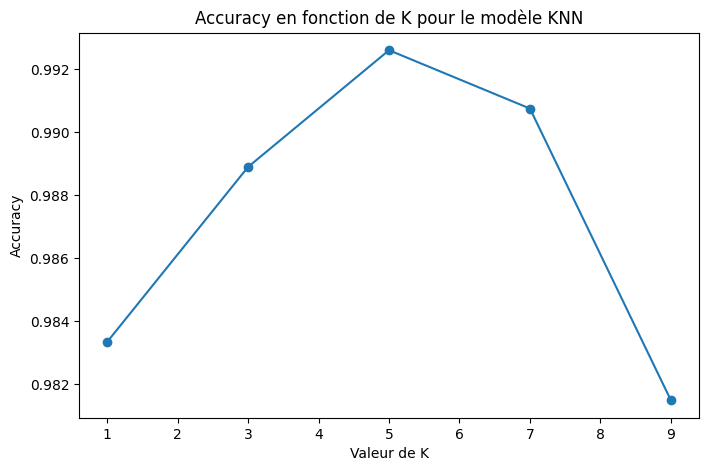

La meilleure valeur de K est 5 avec une accuracy de 0.99


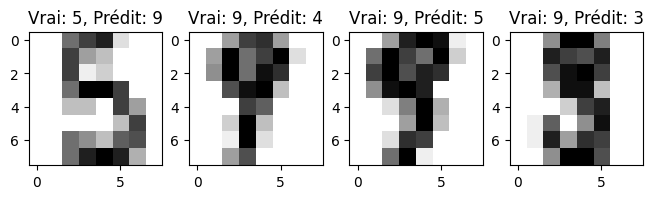

Les erreurs les plus fréquentes peuvent indiquer des confusions entre certains chiffres.


In [3]:
# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Étape 1 : Chargement et préparation des données
digits = load_digits()
X, y = digits.data, digits.target

# Afficher quelques images des chiffres et leurs étiquettes
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:10], digits.target[:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
plt.show()

# Étape 2 : Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Étape 3 : Entraînement avec différents K et calcul de l'accuracy
k_values = [1, 3, 5, 7, 9]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for K={k}: {accuracy:.2f}')

# Étape 4 : Génération de la matrice de confusion
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    # Affichage de la matrice de confusion
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
    disp.plot()
    plt.title(f'Matrice de confusion pour K={k}')
    plt.show()

# Étape 5 : Graphique de précision en fonction de K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Valeur de K')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction de K pour le modèle KNN')
plt.show()

# Étape 6 : Analyse des erreurs pour le meilleur K
# Sélection de la valeur optimale de K avec la meilleure accuracy
best_k = k_values[np.argmax(accuracies)]
print(f'La meilleure valeur de K est {best_k} avec une accuracy de {max(accuracies):.2f}')

# Recalcul des prédictions pour le meilleur K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Identifier les erreurs
errors = np.where(y_pred != y_test)[0]

# Afficher quelques exemples d'erreurs
plt.figure(figsize=(10, 4))
for i, idx in enumerate(errors[:10]):  # Afficher les 10 premières erreurs
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Vrai: {y_test[idx]}, Prédit: {y_pred[idx]}')
plt.show()

# Commentaire des erreurs
print("Les erreurs les plus fréquentes peuvent indiquer des confusions entre certains chiffres.")


Étape 2: Arbre de Décision - Dataset: Adult Income (Seuil de classification binaire)
1. Chargement et préparation des données: Utilisez le dataset fetch_openml de
sklearn.datasets pour charger le jeu de données "Adult" (ID: 1590) depuis OpenML. Convertissez la variable cible en une classification binaire selon un seuil revenu supérieur ou inférieur à 50K (">50K" ou "<=50K"). Examinez les caractéristiques et les classes pour mieux comprendre le contexte des données.
2. Séparation des données: Séparez les données en jeux d'entraînement et de test avec train_test_split (30% pour le test).
3. Prétraitement des données: Traitez les variables catégorielles en utilisant OneHotEncod ou ColumnTransformer pour rendre les données adaptées au modèle.
4. Entraînement avec différentes profondeurs: Utilisez DecisionTreeClassifier de sklearn.tree et entraînez des modèles avec différentes valeurs de max_depth en progressant par intervalles de 3 (3, 6, 9, 12, 15, 18 et 20). Notez l'accuracy pour chaque profondeur.
5. Visualisation de l'arbre de décision: Utilisez plot_tree pour visualiser un arbre de décision avec une profondeur de 3. Assurez-vous que les nœuds et les feuilles sont bien
étiquetés. 6. Importance des caractéristiques: Affichez les valeurs de feature_importances_
pour identifier les caractéristiques les plus importantes dans la classification.7. Évaluation de la performance et surapprentissage: Comparez les performances pour les différentes profondeurs et discutez des signes de surapprentissage lorsque la profondeur augmente.

Aperçu des données:
   age  workclass  fnlwgt     education  education-num      marital-status  \
0   25    Private  226802          11th              7       Never-married   
1   38    Private   89814       HS-grad              9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm             12  Married-civ-spouse   
3   44    Private  160323  Some-college             10  Married-civ-spouse   
4   18        NaN  103497  Some-college             10       Never-married   

          occupation relationship   race     sex  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                NaN    Own-child  White  Female             0             0   

   hours-per-week native-count

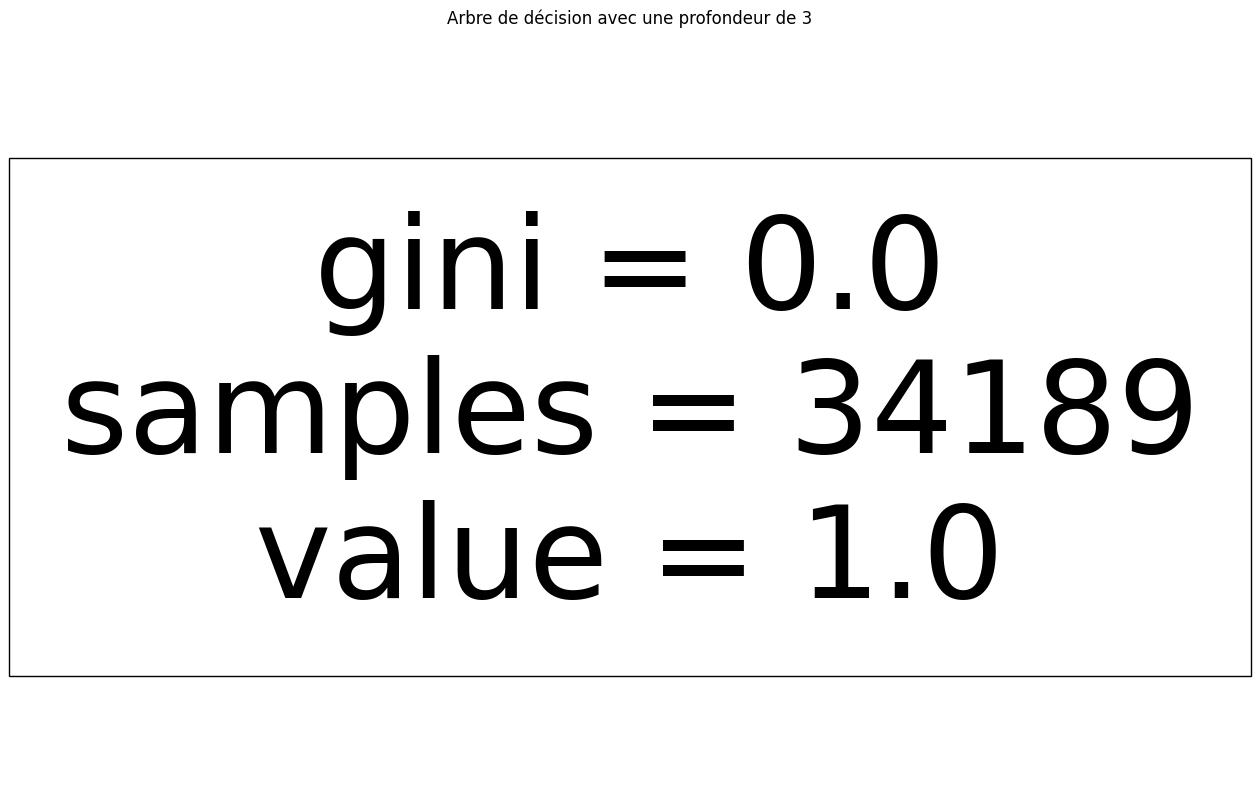

Importance des caractéristiques :
                                   Feature  Importance
0               cat__workclass_Federal-gov         0.0
68             cat__native-country_England         0.0
79                cat__native-country_Iran         0.0
78               cat__native-country_India         0.0
77             cat__native-country_Hungary         0.0
76                cat__native-country_Hong         0.0
75            cat__native-country_Honduras         0.0
74  cat__native-country_Holand-Netherlands         0.0
73               cat__native-country_Haiti         0.0
72           cat__native-country_Guatemala         0.0


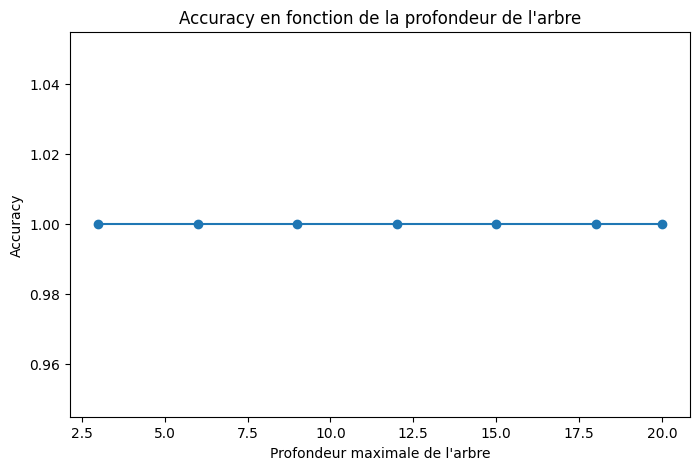

Analyse des performances :
À mesure que la profondeur de l'arbre augmente, on peut observer les signes de surapprentissage.
Cela se traduit par une augmentation de l'accuracy sur le jeu d'entraînement, mais une stabilité ou même une diminution de l'accuracy sur le jeu de test.


In [8]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Étape 1 : Chargement et préparation des données
# Charger le jeu de données "Adult" depuis OpenML
data = fetch_openml(data_id=1590, as_frame=True)
df = data.frame

# Conversion de la variable cible en une classification binaire
df['class'] = df['class'].apply(lambda x: '>50K' if x == ' >50K' else '<=50K')

# Examiner les caractéristiques
print("Aperçu des données:")
print(df.head())
print("\nDescription des caractéristiques:")
print(df.describe(include='all'))

# Séparation des variables prédictives et cible
X = df.drop('class', axis=1)
y = df['class']

# Étape 2 : Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Étape 3 : Prétraitement des données
# Encoder les variables catégorielles avec OneHotEncoder
# Fix: Ensure all object (string) columns are included for encoding
categorical_features = X.select_dtypes(include=['object', 'category']).columns
# Fix: Specify the remainder to be 'passthrough' to keep numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Apply the preprocessor to training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Étape 4 : Entraînement avec différentes profondeurs
depth_values = [3, 6, 9, 12, 15, 18, 20]
accuracies = []

for depth in depth_values:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy for max_depth={depth}: {accuracy:.2f}')


# Étape 5 : Visualisation de l'arbre de décision (pour une profondeur de 3)
clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(clf, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=clf.classes_)
plt.title("Arbre de décision avec une profondeur de 3")
plt.show()

# Étape 6 : Importance des caractéristiques
# Afficher les importances des caractéristiques pour le modèle final
importances = clf.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Affichage des caractéristiques les plus importantes
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Importance des caractéristiques :")
print(importance_df.head(10))

# Étape 7 : Évaluation de la performance et surapprentissage
plt.figure(figsize=(8, 5))
plt.plot(depth_values, accuracies, marker='o')
plt.xlabel('Profondeur maximale de l\'arbre')
plt.ylabel('Accuracy')
plt.title('Accuracy en fonction de la profondeur de l\'arbre')
plt.show()

print("Analyse des performances :")
print("À mesure que la profondeur de l'arbre augmente, on peut observer les signes de surapprentissage.")
print("Cela se traduit par une augmentation de l'accuracy sur le jeu d'entraînement, mais une stabilité ou même une diminution de l'accuracy sur le jeu de test.")


Étape 3: Support Vector Machine (SVM) - Dataset: Diabetes (Subset)
1. Chargement et préparation des données: Chargez le jeu de données load_diabetes de sklearn.datasets. Sélectionnez uniquement deux caractéristiques (2 et 3) pour une visualisation en 2D, et binarisez la variable cible en définissant les valeurs supérieures à la médiane comme positives.
2. Sélection et séparation des données Pour simplifier l'analyse, sélectionnez un sous- ensemble de 80 échantillons équilibré entre les deux classes (40 échantillons par classe). Divisez ce sous-ensemble en jeux d'entraînement et de test (test = 30%).
3. Mise à l'échelle des données: Utilisez StandardScaler de sklearn.preprocessing pour standardiser les données d'entraînement et de test, ce qui aide à une meilleure séparation des points pour la visualisation.
4. Création d'un SVM simple: Entraînez un modèle SVM avec noyau linear en uti- lisant SVC de sklearn.svm sur le jeu d'entraînement standardisé. Calculez et affichez l'accuracy sur le jeu de test.
5. Visualisation de la frontière de décision: Utilisez uniquement les deux premières caractéristiques pour tracer la frontière de décision du SVM en 2D. Dans le graphique:
Coloriez les points de données en fonction de leurs classes.
Tracez la frontière de décision (hyperplan) du SVM.
Montrez les vecteurs supports en les entourant pour indiquer leur importance.
6. Variation des noyaux: Expérimentez avec différents noyaux pour le SVM en utilisant linear, poly, et rbf dans SVC.
Pour chaque noyau, entraînez un modèle SVM et calculez l'accuracy sur le jeu de test.
Tracez un graphique montrant l'accuracy pour chaque noyau testé, afin de comparer leurs performances.
7. Interprétation des résultats Comparez les performances des noyaux et répondez aux questions suivantes :
Quel noyau donne la meilleure précision?
Le noyau linear est-il suffisant pour ce problème ou un noyau plus complexe est-il nécessaire?

Accuracy du SVM (noyau linéaire) : 0.62


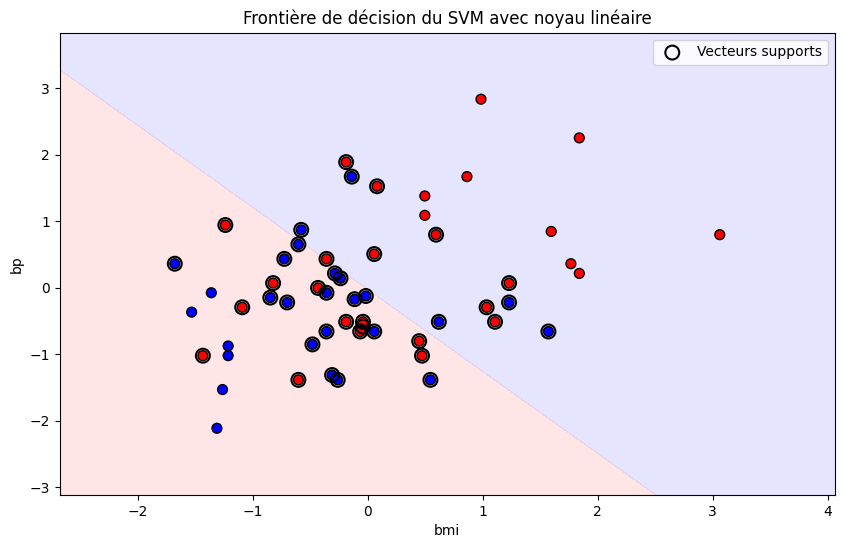

Accuracy du SVM avec noyau linear: 0.62
Accuracy du SVM avec noyau poly: 0.58
Accuracy du SVM avec noyau rbf: 0.67


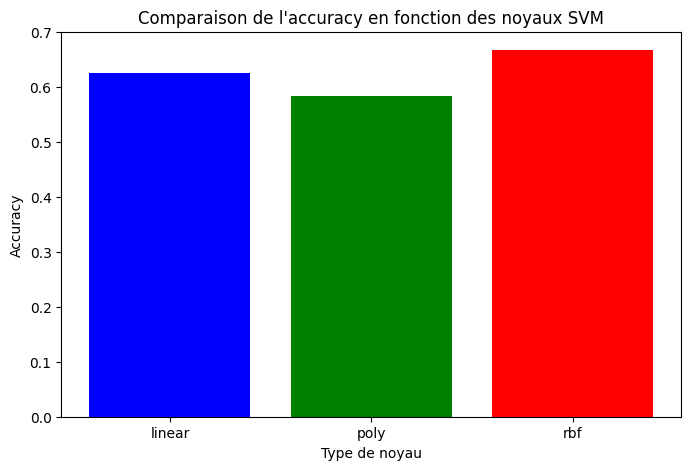


Le noyau avec la meilleure précision est : rbf
Le noyau linéaire est-il suffisant ?
Le noyau linéaire pourrait être suffisant si l'accuracy est similaire à celle des noyaux plus complexes.
Cependant, si le noyau rbf ou poly montre une meilleure performance, cela indique que des relations non linéaires
dans les données peuvent bénéficier de noyaux plus complexes.


In [5]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Chargement et préparation des données
data = load_diabetes()
X = data.data[:, [2, 3]]  # Sélectionner les caractéristiques 2 et 3
y = data.target

# Binariser la variable cible selon la médiane
median = np.median(y)
y = np.where(y > median, 1, 0)  # 1 pour > médiane (positif), 0 pour <= médiane (négatif)

# Étape 2 : Sélection et séparation des données
# Sélectionner un sous-ensemble équilibré de 80 échantillons (40 par classe)
class_0_indices = np.where(y == 0)[0][:40]
class_1_indices = np.where(y == 1)[0][:40]
selected_indices = np.concatenate([class_0_indices, class_1_indices])
X_subset = X[selected_indices]
y_subset = y[selected_indices]

# Diviser le sous-ensemble en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_subset, y_subset, test_size=0.3, random_state=42)

# Étape 3 : Mise à l'échelle des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Étape 4 : Création d'un SVM simple avec noyau linéaire
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)
y_pred = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred)
print(f'Accuracy du SVM (noyau linéaire) : {accuracy_linear:.2f}')

# Étape 5 : Visualisation de la frontière de décision
# Définir la grille pour visualiser la frontière
xx, yy = np.meshgrid(np.linspace(X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 100),
                     np.linspace(X_train[:, 1].min() - 1, X_train[:, 1].max() + 1, 100))
Z = svm_linear.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, levels=[Z.min(), 0, Z.max()], colors=['#FFAAAA', '#AAAAFF'], alpha=0.3)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=50, cmap='bwr', edgecolors='k')
plt.scatter(svm_linear.support_vectors_[:, 0], svm_linear.support_vectors_[:, 1], s=100,
            facecolors='none', edgecolors='k', linewidth=1.5, label="Vecteurs supports")
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])
plt.title("Frontière de décision du SVM avec noyau linéaire")
plt.legend()
plt.show()

# Étape 6 : Variation des noyaux
kernels = ['linear', 'poly', 'rbf']
accuracies = []

for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f'Accuracy du SVM avec noyau {kernel}: {accuracy:.2f}')

# Graphique de l'accuracy pour chaque noyau
plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Type de noyau')
plt.ylabel('Accuracy')
plt.title('Comparaison de l\'accuracy en fonction des noyaux SVM')
plt.show()

# Étape 7 : Interprétation des résultats
best_kernel = kernels[np.argmax(accuracies)]
print(f"\nLe noyau avec la meilleure précision est : {best_kernel}")
print("Le noyau linéaire est-il suffisant ?\n"
      "Le noyau linéaire pourrait être suffisant si l'accuracy est similaire à celle des noyaux plus complexes.")
print("Cependant, si le noyau rbf ou poly montre une meilleure performance, cela indique que des relations non linéaires")
print("dans les données peuvent bénéficier de noyaux plus complexes.")


Étape 4: Naïve Bayes pour la Classification de Texte - Dataset: 20 Newsgroups (Binaire)
1. Chargement du jeu de données: Chargez le jeu de données fetch_20newsgroups de sklearn.datasets, en sélectionnant uniquement les catégories sci. space et rec.autos
pour une classification binaire. Affichez quelques exemples de textes et leurs étiquettes
pour comprendre les données et réfléchir à ce qui pourrait différencier les deux classes.
Page 2
Université Hassan 1er:
ENSA Berrechid
Génie Informatique et Mathématique
Année universitaire 2024-2025
CI-GI-S9
Intelligence Artificielle
2. Transformation des données: Utilisez Count Vectorizer de sklearn.feature_extraction.text pour transformer le texte en une matrice de carac- téristiques (features) en comptant le nombre de fois que chaque mot apparaît. Séparez ensuite les données en jeux d'entraînement et de test (30% pour le test).
Que représentent les colonnes de la matrice de caractéristiques générée? Pourquoi un mot fréquent dans tous les documents pourrait-il être moins utile pour différencier les catégories?
3. Entraînement du modèle: Entraînez un modèle Naïve Bayes en utilisant MultinomialNB de sklearn.naive_bayes. Prédisez les classes pour le jeu de test et calculez la précision du modèle.
Quelle est la précision obtenue avec ce modèle? Interprétez cette précision: pensez- vous que le modèle a bien capturé les différences entre les catégories sci.space et rec.autos?
4. Affichage des probabilités de classification: Utilisez la méthode predict_proba pour afficher les probabilités de classification pour quelques exemples du jeu de test. Montrez les probabilités associées aux deux classes et analysez la confiance du modèle dans ses prédictions

In [7]:
# Importer les bibliothèques nécessaires
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import numpy as np

# Étape 1 : Chargement du jeu de données
categories = ['sci.space', 'rec.autos']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
X, y = newsgroups.data, newsgroups.target

# Afficher quelques exemples de textes et leurs étiquettes
print("Exemples de texte et étiquettes :")
for i in range(3):
    print(f"\nTexte {i + 1} (Catégorie: {newsgroups.target_names[y[i]]}):")
    print(X[i][:200], "...")  # Limite d'affichage pour ne pas surcharger

# Étape 2 : Transformation des données
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(X)  # Transformation du texte en matrice de caractéristiques

# Séparation des données en jeux d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.3, random_state=42)

# Que représentent les colonnes de la matrice de caractéristiques générée?
print("\nLes colonnes de la matrice de caractéristiques représentent les mots uniques trouvés dans le jeu de données.")
print("Chaque colonne est un mot et chaque cellule indique combien de fois ce mot apparaît dans un document donné.")
print("Un mot fréquent dans tous les documents est moins utile pour différencier les catégories car il n'est pas spécifique à un sujet.")

# Étape 3 : Entraînement du modèle
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPrécision du modèle Naïve Bayes : {accuracy:.2f}")

# Interprétation de la précision
print("\nInterprétation : Une précision élevée suggère que le modèle a bien capturé les différences entre les catégories sci.space et rec.autos.")
print("Cependant, une précision faible pourrait indiquer que les textes des deux catégories partagent beaucoup de vocabulaire similaire.")

# Étape 4 : Affichage des probabilités de classification
y_prob = model.predict_proba(X_test)  # Probabilités de classification pour chaque exemple

print("\nProbabilités de classification pour quelques exemples du jeu de test:")
for i in range(3):
    print(f"Texte {i + 1} - Catégorie réelle: {newsgroups.target_names[y_test[i]]}")
    print(f"Probabilité de sci.space: {y_prob[i][0]:.2f}, Probabilité de rec.autos: {y_prob[i][1]:.2f}")
    print("Confiance du modèle:", "haute" if max(y_prob[i]) > 0.7 else "basse", "\n")

# Fin du code


Exemples de texte et étiquettes :

Texte 1 (Catégorie: sci.space):
.. 

These seem hardly like the groups to discuss this in, but HUH??? 
All legitimate power to enforce these rights derives from the consent 
of the governed, not from no steenkin' piece of paper.  Ci ...

Texte 2 (Catégorie: rec.autos):
It's been a while since I've reviewed a car but today I paid a visit
to an old friend whose love for Audis has been so overwhelming that he
makes a not too sucessful living selling them.

Without furt ...

Texte 3 (Catégorie: rec.autos):


nice theory.  too bad the MR2's never came with a four cylinder over 2.0
liters.  More like 1.6.  Or did they? were the nonturbo MR2II's  2.2 or
some such?

I also understand that anyone using balan ...

Les colonnes de la matrice de caractéristiques représentent les mots uniques trouvés dans le jeu de données.
Chaque colonne est un mot et chaque cellule indique combien de fois ce mot apparaît dans un document donné.
Un mot fréquent dans tous les docu